In [1]:
import pandas as pd
import re
import string



In [2]:
df = pd.read_csv("sentiment_analysis_nepali_final.csv")

In [3]:
df.head(5)

,Unnamed: 0,Sentences,Sentiment
0,0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'Sentences', 'Sentiment'], dtype='object')


In [5]:
data=df.drop(['Unnamed: 0'],axis=1,inplace=False)
data.head(4)

,Sentences,Sentiment
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1


In [6]:
suffle_data =data.sample(frac=1)
suffle_data.head(10)

,Sentences,Sentiment
30000,हेटौंडामा कोरोना भाइरस रोग कोभिड संक्रमण परीक्...,1
8898,लुम्बिनी प्रादेशिक अस्पतालमा आईसीयु अभाव कोभिड...,-1
23790,अहिलेको समय सान्दर्भिक विषय बनेको कोभिड का बार...,1
29380,कोभिड विरुद्ध सबै एक भएर लड्न मन्त्री रावलको आ...,1
33328,कोभिड महोत्तरीका सीमानाका बन्द,-1
16683,कोभिड को प्रकोपबाट गाउँ फर्केका नेपाली युवालाई...,1
15657,कोभिड महामारीका कारण दक्षिण एशियामा मिलियन बाल...,-1
3014,राज्य उदासीन भएको भन्दै व्यवसायी गरे आन्दोलन घ...,-1
16119,कोभीड को जोखिमको बेला गलत सूचना संप्रेशण भई रह...,1
21771,भारत र नेपालका विभिन्न स्थानबाट प्रदेशको सीमाम...,1


In [7]:
suffle_data.reset_index(inplace=True)
suffle_data.head()

,index,Sentences,Sentiment
0,30000,हेटौंडामा कोरोना भाइरस रोग कोभिड संक्रमण परीक्...,1
1,8898,लुम्बिनी प्रादेशिक अस्पतालमा आईसीयु अभाव कोभिड...,-1
2,23790,अहिलेको समय सान्दर्भिक विषय बनेको कोभिड का बार...,1
3,29380,कोभिड विरुद्ध सबै एक भएर लड्न मन्त्री रावलको आ...,1
4,33328,कोभिड महोत्तरीका सीमानाका बन्द,-1


In [8]:
suffle_data.isnull().sum()

index        0
Sentences    0
Sentiment    0
dtype: int64

In [9]:
def wordopt(Sentences):
    
    
    # Title = Title.lower()
    Sentences = re.sub(r'[\[\]]', '', Sentences)  # Remove square brackets
    Sentences= re.sub(r'https?://\S+|www\.\S+', '', Sentences)  # Remove URLs
    Sentences = re.sub(r'<.*?>', '', Sentences)  # Remove HTML tags
    Sentences = re.sub(f'[{re.escape(string.punctuation)}]', '', Sentences)  # Remove punctuation
    Sentences = re.sub(r'\n', '', Sentences)  # Remove newlines
    Sentences = re.sub(r'\w*\d\w*', '', Sentences)  # Remove words with digits
    Sentences = re.sub(r'\b[a-zA-Z]+\b', '', Sentences)  # This removes English words    
    return Sentences


In [10]:
data['cleandata']= data['Sentences'].apply (wordopt)
data.head(5)

,Sentences,Sentiment,cleandata
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...


In [11]:
data.head(5)

,Sentences,Sentiment,cleandata
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...


In [12]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download tokenizer data

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
data.head(5)

,Sentences,Sentiment,cleandata
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...


In [14]:
data.columns

Index(['Sentences', 'Sentiment', 'cleandata'], dtype='object')

In [15]:
import pandas as pd
import nltk
nltk.download('punkt_tab', quiet=True)  # quiet=True avoids the popup

from nltk.tokenize import word_tokenize

data['lose'] = data['cleandata'].apply(word_tokenize)
data.head()


,Sentences,Sentiment,cleandata,lose
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...,"[म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान..."
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...,"[म, सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्..."
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,"[कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ..."
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,"[मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधार..."
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,"[यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर..."


# Checking Null value

In [16]:
suffle_data.isnull().sum()

index        0
Sentences    0
Sentiment    0
dtype: int64

In [17]:
data.head()

,Sentences,Sentiment,cleandata,lose
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...,"[म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान..."
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...,"[म, सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्..."
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,"[कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ..."
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,"[मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधार..."
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,"[यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर..."


In [18]:
def wordopt(Title):
    
    
    # Title = Title.lower()
    Title = re.sub(r'[\[\]]', '', Title)  # Remove square brackets
    Title = re.sub(r'https?://\S+|www\.\S+', '', Title)  # Remove URLs
    Titel = re.sub(r'<.*?>', '', Title)  # Remove HTML tags
    Title = re.sub(f'[{re.escape(string.punctuation)}]', '', Title)  # Remove punctuation
    Title = re.sub(r'\n', '', Title)  # Remove newlines
    Title = re.sub(r'\w*\d\w*', '', Title)  # Remove words with digits
    Title = re.sub(r'\b[a-zA-Z]+\b', '', Title)  # This removes English words    
    return Title

In [19]:
data.head(10)

,Sentences,Sentiment,cleandata,lose
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...,"[म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान..."
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...,"[म, सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्..."
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,"[कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ..."
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,"[मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधार..."
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,"[यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर..."
5,उपनियाशमा चलचित्र बनाउदा सबैको बुचार गरेर बनाक...,-1,उपनियाशमा चलचित्र बनाउदा सबैको बुचार गरेर बनाक...,"[उपनियाशमा, चलचित्र, बनाउदा, सबैको, बुचार, गरे..."
6,नेपालमा बनेको अहिले सम्मको सबै भन्दा खाते फिल...,-1,नेपालमा बनेको अहिले सम्मको सबै भन्दा खाते फिल...,"[नेपालमा, बनेको, अहिले, सम्मको, सबै, भन्दा, खा..."
7,"कठै बिचारा कस्तो निर्देशक कस्ता कलाकार, इतिहास...",-1,कठै बिचारा कस्तो निर्देशक कस्ता कलाकार इतिहास ...,"[कठै, बिचारा, कस्तो, निर्देशक, कस्ता, कलाकार, ..."
8,यो फिल्मले मन छोयो एकदमै राम्रो छ,1,यो फिल्मले मन छोयो एकदमै राम्रो छ,"[यो, फिल्मले, मन, छोयो, एकदमै, राम्रो, छ]"
9,राम्रो छ फिल्म। यत्तीको फिल्म नेपालमा आउनु नै ...,1,राम्रो छ फिल्म। यत्तीको फिल्म नेपालमा आउनु नै ...,"[राम्रो, छ, फिल्म।, यत्तीको, फिल्म, नेपालमा, आ..."


In [20]:
data.columns

Index(['Sentences', 'Sentiment', 'cleandata', 'lose'], dtype='object')

In [21]:
# Define the path to your stopwords text file
stopwords_file_path = "stopwords.txt"

# Load the stopwords into a list or set
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    nepali_stopwords = {line.strip() for line in file}

# Check the stopwords
print(f"Loaded {len(nepali_stopwords)} Nepali stopwords.")
print(nepali_stopwords)

Loaded 851 Nepali stopwords.
{'', 'भित्री', 'देख्न', 'सम', 'पन्ध्र', 'सब', 'सक्नुहुन्छ', 'आफ्नो', 'जसला', 'देख्', 'भन्छ', 'तिनि', 'यत', 'चोटी', 'निम्त', 'चाहिंले', 'हुनु', 'नचाहे', 'थिएनन्', 'पछिल्ल', 'कहिल्य', 'साथ', 'गर्दछ', 'तल', 'त्यत्तिकै', 'लिए', 'कमसेकम', 'स्पष्ट', 'समय', 'औं', 'सकिने', 'मार्फ', 'साथै', 'देखिय', 'तिरको', 'कतै', 'कसैल', 'कसरी', 'बारे', 'होल', 'दिनुभएको', 'छै', 'सक्दै', 'दर्ता', 'जस्तो', 'सायद', 'थिएन', 'यद', 'लगभ', 'गर्ने', 'फेरी', 'त्सपछि', 'साय', 'भन्दा', 'ठी', 'उहाला', 'भन्', 'प्रत', 'उनल', 'चाहन्थ', 'पक्का', 'जहाँ', 'आदिलाई', 'घर', 'होस', 'नै', 'हेर्न', 'पाँच', 'आफैँ', 'हाम्रो', 'सँगसँगै', 'यसपछि', 'जोपनी', 'यसबाहेक', 'हौं', 'अन्यत्र', 'जा', 'गरिरहे', 'छु', 'दोश्री', 'सँग', 'तिम्र', 'हुन', 'वाहेक', 'प्राय', 'चाहिं', 'उनि', 'होइनन्', 'कस्त', 'दिन्छ', 'यसैल', 'नभनेर', 'जबक', 'होला', 'उन', 'चार', 'छ', 'दु', 'अलग', 'स्थित', 'उसला', 'भयेन', 'पूर्व', 'बी', 'हामीलाई', 'आफ', 'या', 'त्यस', 'पछाडि', 'जस्ता', 'थप', 'आदि', 'मध्ये', 'देखिन्छ', 'मेर', 'उदाहर', 'भएकालाई', '

In [22]:
def remove_stopwords_nepali(tokens, stopwords):

    filtered_tokens = []

    for token in tokens:
        original_token = token
        token_modified = False

        # Check for full word matches and suffixes
        for stopword in stopwords:
            if token == stopword:  # Remove stopword if it's a full word
                token = ""
                token_modified = True
                break  # No need to check further stopwords if one has been removed

            elif token.endswith(stopword):  # Check if stopword is a suffix
                remaining_token = token[:-len(stopword)].strip()
                if remaining_token:  # Only modify if the remaining token is valid
                    token = remaining_token
                    token_modified = True
                    break  # No need to check further stopwords if one has been removed

        # Add only non-empty tokens and those that are meaningfully modified
        if token and (not token_modified or token != original_token):
            filtered_tokens.append(token)

    return filtered_tokens

In [23]:
data['stopwords'] = data['lose'].apply(lambda x: remove_stopwords_nepali(x, nepali_stopwords))
data.head(20)

,Sentences,Sentiment,cleandata,lose,stopwords
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...,"[म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान...","[ए, शिक्ष, शिक्षा, क्षेत्र, रमाए, मान्छे, ।, स..."
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...,"[म, सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्...","[सरकारी, स्कूलकलेज, पढे, करीब, बर्ष, बिभिन्, ब..."
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,"[कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ...","[शि, मन्दि, पाइ, कु, ठाउ, धन्यवाद, सम्पुर्ण, ट..."
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,"[मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधार...","[मारुनी, वितिकै, सामान्, नाचनी, आधारि, कथा, ला..."
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,"[यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर...","[फ्लि, हेरिसके, कि, दर्सकहरु, साम्राज्ञि, य, म..."
5,उपनियाशमा चलचित्र बनाउदा सबैको बुचार गरेर बनाक...,-1,उपनियाशमा चलचित्र बनाउदा सबैको बुचार गरेर बनाक...,"[उपनियाशमा, चलचित्र, बनाउदा, सबैको, बुचार, गरे...","[उपनियाश, चलचित्, बनाउदा, सबै, बु, बना, भ, थि,..."
6,नेपालमा बनेको अहिले सम्मको सबै भन्दा खाते फिल...,-1,नेपालमा बनेको अहिले सम्मको सबै भन्दा खाते फिल...,"[नेपालमा, बनेको, अहिले, सम्मको, सबै, भन्दा, खा...","[नेपाल, बने, सम्म, खाते, फिल्, यहि, हावादारि, ..."
7,"कठै बिचारा कस्तो निर्देशक कस्ता कलाकार, इतिहास...",-1,कठै बिचारा कस्तो निर्देशक कस्ता कलाकार इतिहास ...,"[कठै, बिचारा, कस्तो, निर्देशक, कस्ता, कलाकार, ...","[कठै, बिचारा, निर्देश, कस्ता, कलाका, इतिहा, मज..."
8,यो फिल्मले मन छोयो एकदमै राम्रो छ,1,यो फिल्मले मन छोयो एकदमै राम्रो छ,"[यो, फिल्मले, मन, छोयो, एकदमै, राम्रो, छ]","[फिल्म, म, छो, एकदमै]"
9,राम्रो छ फिल्म। यत्तीको फिल्म नेपालमा आउनु नै ...,1,राम्रो छ फिल्म। यत्तीको फिल्म नेपालमा आउनु नै ...,"[राम्रो, छ, फिल्म।, यत्तीको, फिल्म, नेपालमा, आ...","[फिल्म।, यत्ती, फिल्, नेपाल, आउनु]"


In [24]:
data.to_csv('clean data.csv', index=False)

In [25]:
data.head()

,Sentences,Sentiment,cleandata,lose,stopwords
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे । ...,"[म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान...","[ए, शिक्ष, शिक्षा, क्षेत्र, रमाए, मान्छे, ।, स..."
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1,म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी...,"[म, सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्...","[सरकारी, स्कूलकलेज, पढे, करीब, बर्ष, बिभिन्, ब..."
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,"[कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ...","[शि, मन्दि, पाइ, कु, ठाउ, धन्यवाद, सम्पुर्ण, ट..."
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,"[मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधार...","[मारुनी, वितिकै, सामान्, नाचनी, आधारि, कथा, ला..."
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,"[यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर...","[फ्लि, हेरिसके, कि, दर्सकहरु, साम्राज्ञि, य, म..."


In [26]:
# Select only Sentiment and stopwords columns
new_data = data[['Sentiment', 'stopwords']]

# Show the first few rows
new_data.head()


,Sentiment,stopwords
0,1,"[ए, शिक्ष, शिक्षा, क्षेत्र, रमाए, मान्छे, ।, स..."
1,1,"[सरकारी, स्कूलकलेज, पढे, करीब, बर्ष, बिभिन्, ब..."
2,1,"[शि, मन्दि, पाइ, कु, ठाउ, धन्यवाद, सम्पुर्ण, ट..."
3,1,"[मारुनी, वितिकै, सामान्, नाचनी, आधारि, कथा, ला..."
4,1,"[फ्लि, हेरिसके, कि, दर्सकहरु, साम्राज्ञि, य, म..."


In [27]:
x = data['stopwords']
y = data['Sentiment']

In [30]:
suffle_data=new_data.sample(frac=1)
suffle_data.head(5)

,Sentiment,stopwords
9099,1,"[चिनियाँ, राष्ट्रप, सी, कोभिड, विरुद्ध, लडाई, ..."
12690,-1,"[सार्वजनि, ऋण, कु, गार्हस्थ्, उत्पादन, अनुपा, ..."
22428,1,"[सिदार्, गौत, बुद्ध, जन्, जयन्, आज, देश, शान्त..."
34184,1,"[नेपा, सरकार, निर्णयहरु, स्वागतयोग्, छ, यस, का..."
26698,1,"[बसे, मन्त्रिपरिषद्, बैठक, कोरोना, भाइर, कोभिड..."


In [32]:
x

0        [ए, शिक्ष, शिक्षा, क्षेत्र, रमाए, मान्छे, ।, स...
1        [सरकारी, स्कूलकलेज, पढे, करीब, बर्ष, बिभिन्, ब...
2        [शि, मन्दि, पाइ, कु, ठाउ, धन्यवाद, सम्पुर्ण, ट...
3        [मारुनी, वितिकै, सामान्, नाचनी, आधारि, कथा, ला...
4        [फ्लि, हेरिसके, कि, दर्सकहरु, साम्राज्ञि, य, म...
                               ...                        
35784    [कोरोना, भाइरस, विश्, स्वास्थ्, संगठन, दि, ना,...
35785               [डब्ल्युएचओ, दियाे, कोरोना, ना, कोभिड]
35786           [कोरोना, भाइर, संक्रमण, औपचारि, ना, कोभिड]
35787    [विश्, स्वास्थ्, संगठ, डब्लुएच, नोब, कोरोना, भ...
35788    [कोरोनाभाइरस, सङ्क्रमण, ना, कोभिड, विश्, स्वास...
Name: stopwords, Length: 35789, dtype: object

In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
35784    0
35785    0
35786    0
35787    0
35788    0
Name: Sentiment, Length: 35789, dtype: int64

In [34]:
suffle_data.describe()

,Sentiment
count,35789.000000
mean,0.041130
std,0.919035
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


In [35]:
suffle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35789 entries, 9099 to 15066
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  35789 non-null  int64 
 1   stopwords  35789 non-null  object
dtypes: int64(1), object(1)
memory usage: 838.8+ KB


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [42]:
x_train.shape

(28631,)

In [44]:
x_test.shape

(7158,)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_train = [' '.join(doc) for doc in x_train]
x_test = [' '.join(doc) for doc in x_test]


In [48]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xv_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
pred_lr=model.predict(xv_test)

In [52]:
model.score(xv_test, y_test)


0.6377479742944957

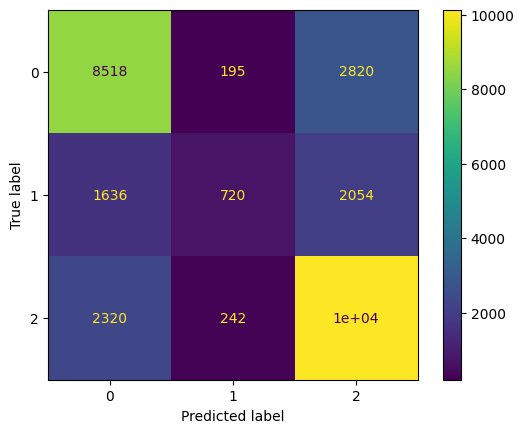

Classification Report for Training Data:
              precision    recall  f1-score   support

          -1       0.68      0.74      0.71     11533
           0       0.62      0.16      0.26      4410
           1       0.68      0.80      0.73     12688

    accuracy                           0.68     28631
   macro avg       0.66      0.57      0.57     28631
weighted avg       0.67      0.68      0.65     28631

Training Accuracy: 0.68


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Predict on the training data
pred_train_lr = model.predict(xv_train)  # Ensure 'model' is your trained logistic regression model

# Step 2: Compute the confusion matrix
cm_train = confusion_matrix(y_train, pred_train_lr)

# Step 3: Display the confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()  # Visualize the confusion matrix
plt.show()  # Ensure the plot is displayed if running in some environments

# Step 4: Print classification metrics
print("Classification Report for Training Data:")
print(classification_report(y_train, pred_train_lr))

# Optional: Print accuracy explicitly
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, pred_train_lr)
print(f"Training Accuracy: {accuracy_train:.2f}")

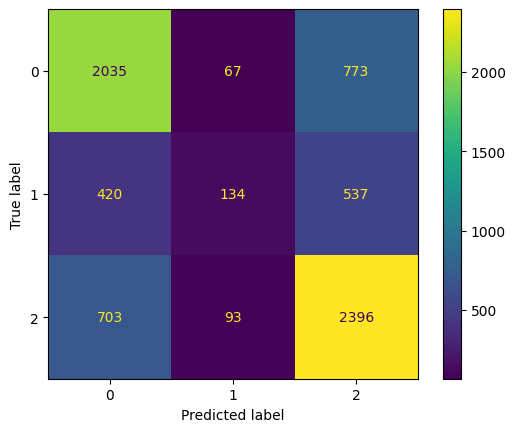

              precision    recall  f1-score   support

          -1       0.64      0.71      0.67      2875
           0       0.46      0.12      0.19      1091
           1       0.65      0.75      0.69      3192

    accuracy                           0.64      7158
   macro avg       0.58      0.53      0.52      7158
weighted avg       0.62      0.64      0.61      7158



In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, pred_lr))

In [57]:
from sklearn.metrics import matthews_corrcoef

# Assuming y_test is your true labels and y_pred is your model predictions
mcc_score = matthews_corrcoef(y_test, pred_lr)

print(f"MCC Score: {mcc_score}")

MCC Score: 0.38875333928178163
